In [1]:
import os
import shutil

import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from PIL import Image

InteractiveShell.ast_node_interactivity = "all"

In [2]:
IMG_PATH = "/app/_data/plantvillage dataset/color/"

In [3]:
list_folders = os.listdir(IMG_PATH)
list_folders.sort()

In [4]:
list_folders

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [46]:
P = IMG_PATH + "Tomato___Septoria_leaf_spot/"
# P = IMG_PATH+'Squash___Powdery_mildew/'
# P = IMG_PATH+'Grape___Black_rot/'
# P = IMG_PATH+'Cherry_(including_sour)___healthy/'

(256, 256)

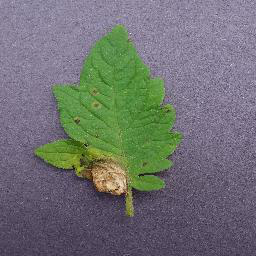

In [47]:
img_name = os.listdir(P)[22]
img = Image.open(P + img_name)
img.size
img

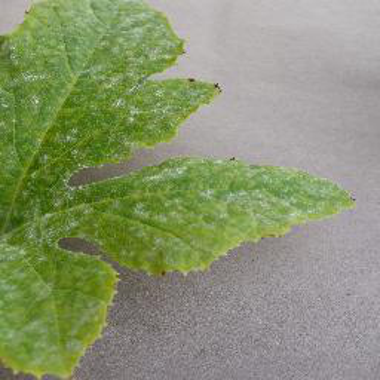

In [42]:
img = img.resize((380, 380))
img

In [55]:
from tqdm import notebook, tqdm
import tensorflow as tf
import numpy as np

In [58]:
# df = pd.DataFrame()
# for dir_name in ["Apple___Apple_scab", "Apple___Black_rot", "Apple___healthy"]:
#     for img_name in os.listdir("/app/_data/plantvillage dataset/color/" + dir_name):
#         df = df.append({"image": img_name, "labels": dir_name}, ignore_index=True)
df = pd.DataFrame()
for dir_name in ["Squash___Powdery_mildew/",
    "Grape___Black_rot/",
    "Cherry_(including_sour)___healthy/"]:
    for img_name in os.listdir("/app/_data/plantvillage dataset/color/" + dir_name):
        df = df.append({"image": img_name, "labels": dir_name}, ignore_index=True)

In [62]:
df["labels"] = df["labels"].replace(
    {
        "Squash___Powdery_mildew/": "powdery_mildew",
        "Grape___Black_rot/": "frog_eye_leaf_spot",
        "Cherry_(including_sour)___healthy/": "healthy",
    }
)

In [64]:
# df.to_csv('/app/_data/df_csv/plantvillage_plants.csv', index=False)

In [57]:
for dir_name in [
    "Apple___Apple_scab/",
    "Apple___Black_rot/",
    "Apple___healthy/",
    "Squash___Powdery_mildew/",
    "Grape___Black_rot/",
    "Cherry_(including_sour)___healthy/",
]:
    for img_name in tqdm(
        os.listdir("/app/_data/plantvillage dataset/color/" + dir_name)
    ):
        img = tf.io.read_file(
            "/app/_data/plantvillage dataset/color/" + dir_name + img_name
        )
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, (380, 380))
        img = tf.cast(img, tf.uint8).numpy()
        np.save("/app/_data/380_npy/" + img_name[:-4], img)

100%|██████████| 854/854 [00:04<00:00, 206.51it/s]


In [64]:
df["labels"] = df["labels"].replace(
    {
        "Apple___Apple_scab": "scab",
        "Apple___Black_rot": "frog_eye_leaf_spot",
        "Apple___healthy": "healthy",
    }
)

In [48]:
# df.to_csv('/app/_data/df_csv/plantvillage_apple.csv', index=False)
df = pd.read_csv("/app/_data/df_csv/plantvillage_apple.csv")

In [49]:
df

,image,labels
0,6fb62aa7-c3d4-457a-b95d-a8b3102cccd8___FREC_Sc...,scab
1,f18c0441-917e-4f34-b26e-a1a71d0adec2___FREC_Sc...,scab
2,add9ce00-e304-4632-82f2-ddc86a6be5f6___FREC_Sc...,scab
3,716a13b6-1747-40d8-96d7-5ec1c183b3b5___FREC_Sc...,scab
4,1cdf2779-8cb1-4ae4-be70-b0eeb1abb0f8___FREC_Sc...,scab
...,...,...
2891,8e4b14b2-2601-4ffc-805c-a68b200e80ec___RS_HL 8...,healthy
2892,3876f449-0cd6-4910-9321-f56a28621c51___RS_HL 7...,healthy
2893,5ceb4c0b-09ea-48e5-87b8-454adc630534___RS_HL 7...,healthy
2894,398f4455-d008-4d69-a58d-b0a1f228abaa___RS_HL 5...,healthy


In [2]:
# ! kaggle datasets download -d abdallahalidev/plantvillage-dataset

100%|█████████████████████████████████████▉| 2.04G/2.04G [02:35<00:00, 14.7MB/s]
100%|██████████████████████████████████████| 2.04G/2.04G [02:35<00:00, 14.1MB/s]


## Images from MY

In [7]:
PATH_MY = "/app/_data/images_my/"

In [17]:
df_my = pd.DataFrame()
for img_name in os.listdir(PATH_MY):
    if "powdery" in img_name.split("_"):
        label = "powdery_mildew"
    elif "rust" in img_name.split("_"):
        label = "rust"
    df_my = df_my.append({"image": img_name, "labels": label}, ignore_index=True)

In [18]:
df_my

,image,labels
0,gi_powdery_mildew_10112.jpg,powdery_mildew
1,gi_powdery_mildew_10020.jpg,powdery_mildew
2,gi_rust_disease_leaves_10045.jpg,rust
3,gi_rust_disease_leaves_10040.jpg,rust
4,gi_rust_disease_leaves_10112.jpg,rust
...,...,...
199,gi_rust_disease_leaves_10057.jpeg,rust
200,gi_rust_disease_leaves_10002.jpg,rust
201,gi_powdery_mildew_10008.jpg,powdery_mildew
202,gi_powdery_mildew_10059.jpg,powdery_mildew


In [19]:
df_my.to_csv("/app/_data/df_csv/images_my.csv", index=False)